## Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)

## Reading Data :

In [2]:
data_df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## See some insights :

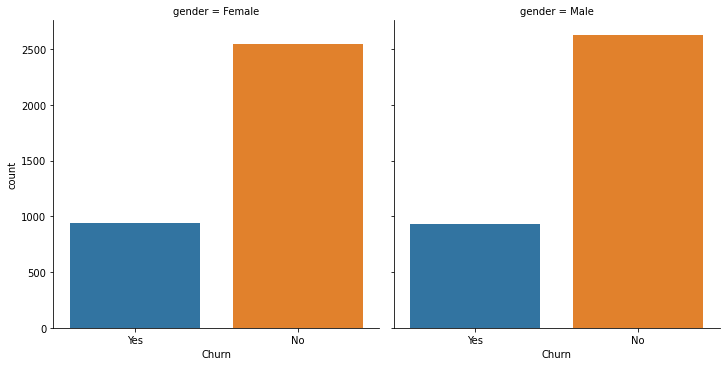

In [6]:
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='gender')

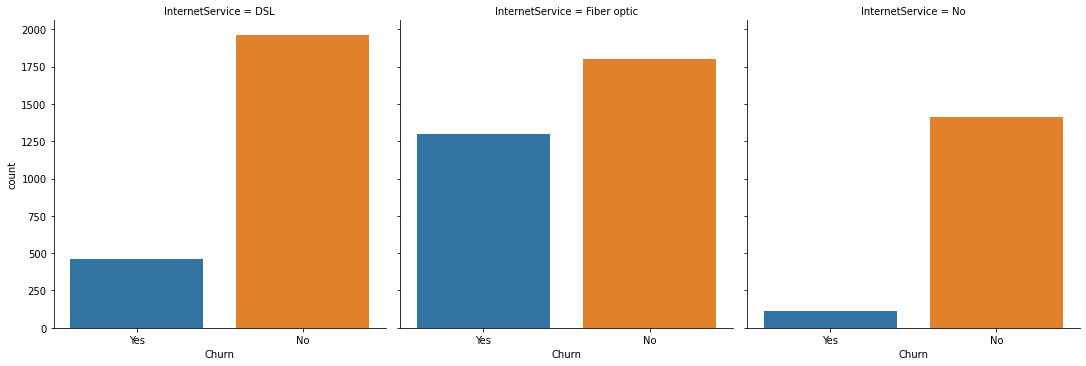

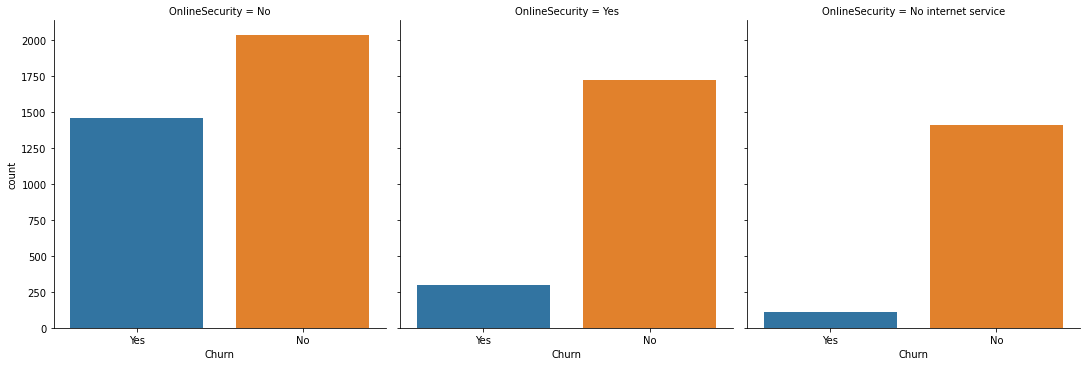

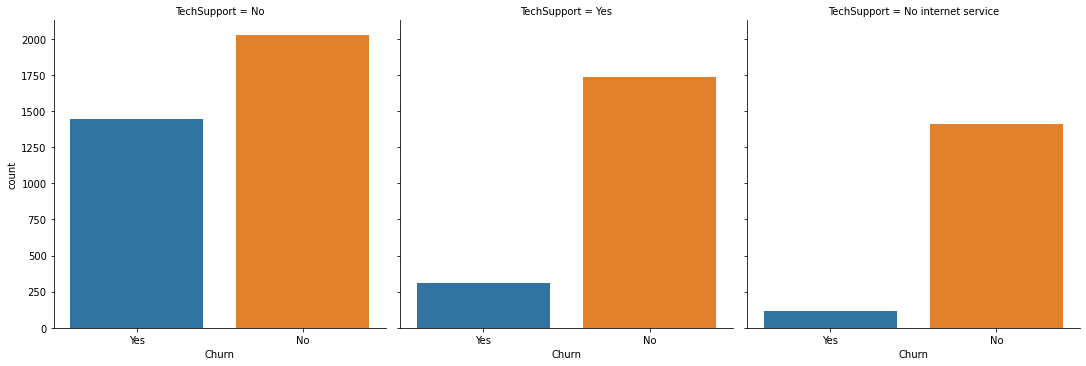

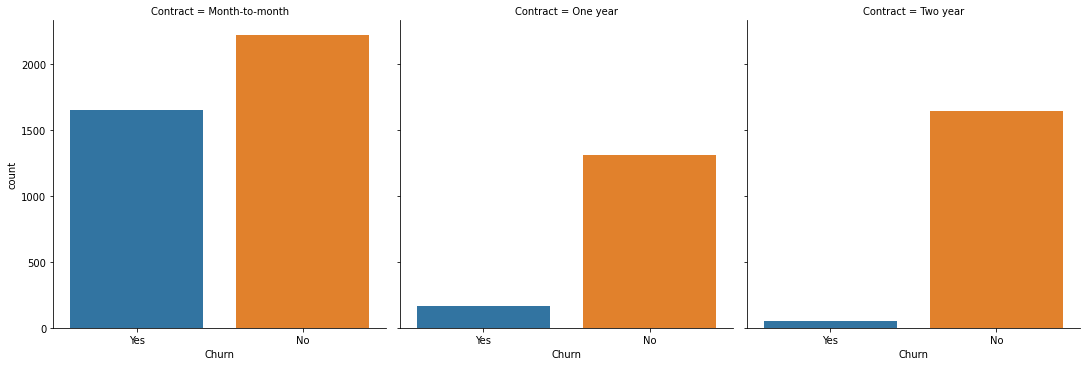

In [7]:
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='InternetService')
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='OnlineSecurity')
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='TechSupport')
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='Contract')

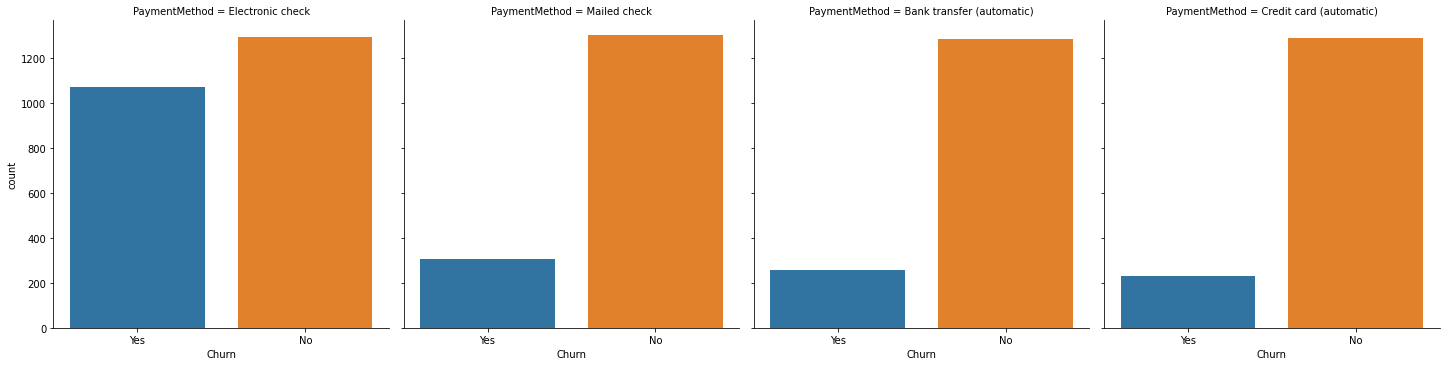

In [8]:
sb.catplot(data=data_df, kind='count', x='Churn', order=['Yes','No'], col='PaymentMethod')

### We thought that gender would make any difference but it seems to be not as we thought.
### And as we see there are some reasons for churn :
1. Internet Service = Fiber optic ---- (which means FI-OP service need some care)
2. Online Security = No ---- (Online Security needs to be activated users)
3. Tech Support = No ---- (Tech Support service need some care)
4. Contract = Month to month ---- (We need to extend contract per 6 months for example)
5. Payment Method = Electronic Check ---- (Maybe because it's an easy way!)

## Getting dummies of non numirical columns :

In [9]:
dum_columns = data_df.columns[data_df.nunique().values<5]

In [10]:
dum_data = pd.get_dummies(data_df, columns=dum_columns)
dum_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

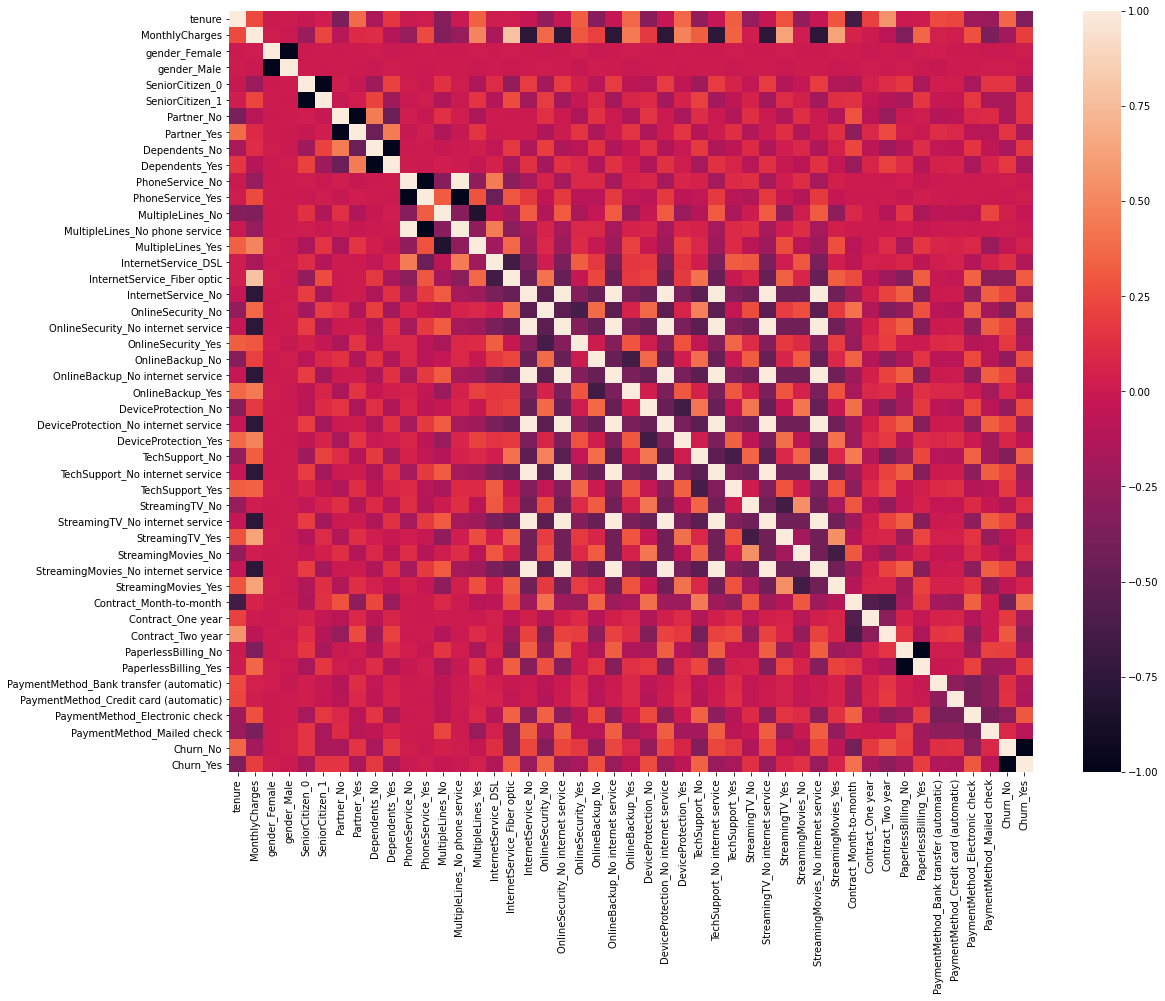

In [11]:
plt.figure(figsize=(18,14))
sb.heatmap(dum_data.corr())
plt.tight_layout
# It seems we have many columns to deal with

## Let's see which columns correlated churn :

In [12]:
def find_corr_with (Data,column,num_of_corr_cols) :

    corr = Data.corr()[column].reindex(Data.corr().drop(column,axis=1).columns)
    corr = corr.sort_values()
    corr = corr[::-1]
    
    return corr.head(num_of_corr_cols)

In [13]:
corr_cols = find_corr_with(dum_data, 'Churn_Yes', 10)
corr_cols

Contract_Month-to-month           0.405103
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
OnlineBackup_No                   0.268005
DeviceProtection_No               0.252481
MonthlyCharges                    0.193356
PaperlessBilling_Yes              0.191825
Dependents_No                     0.164221
Name: Churn_Yes, dtype: float64

In [14]:
corr_data = dum_data[corr_cols.index]
corr_data

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,MonthlyCharges,PaperlessBilling_Yes,Dependents_No
0,1,1,1,0,1,0,1,29.85,1,1
1,0,0,1,0,0,1,0,56.95,0,1
2,1,0,1,0,0,0,1,53.85,1,1
3,0,0,0,0,0,1,0,42.30,0,1
4,1,1,1,1,1,1,1,70.70,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,1,0,84.80,1,0
7039,0,1,1,1,0,0,0,103.20,1,0
7040,1,0,1,0,1,1,1,29.60,1,0
7041,1,1,1,1,0,1,1,74.40,1,1


## Split Data to enter the Machine Learning model :

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = corr_data
y = dum_data['Churn_Yes']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Machine Learning Model :

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
print('Training Score : ', model.score(X_train,y_train))
print('Test Score : ', model.score(X_test,y_test))
print('Error :', np.sqrt(mean_squared_error(predictions,y_test)))

Training Score :  0.7857142857142857
Test Score :  0.7879569892473118
Error : 0.46048128165288993
